### Predicting the income of a Person based on the adult dataset

The dataset extraction was done by  Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.


### Load the requried libraries for analysing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Load the adult dataset 

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
## Checking the shape of dataset

df.shape

(48842, 15)

In [5]:
## Checking the datatypes of the all columns in the dataset

df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
### checking  the null values in the dataset

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
## Checking for number of unique values in the dataset of each column

df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
## Describing the Statistical information of whole dataset

df.describe().T

count           mean            std      min       25%  \
age              48842.0      38.643585      13.710510     17.0      28.0   
fnlwgt           48842.0  189664.134597  105604.025423  12285.0  117550.5   
educational-num  48842.0      10.078089       2.570973      1.0       9.0   
capital-gain     48842.0    1079.067626    7452.019058      0.0       0.0   
capital-loss     48842.0      87.502314     403.004552      0.0       0.0   
hours-per-week   48842.0      40.422382      12.391444      1.0      40.0   

                      50%       75%        max  
age                  37.0      48.0       90.0  
fnlwgt           178144.5  237642.0  1490400.0  
educational-num      10.0      12.0       16.0  
capital-gain          0.0       0.0    99999.0  
capital-loss          0.0       0.0     4356.0  
hours-per-week       40.0      45.0       99.0

In [9]:
## Checking the value count of workclass column 

df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

You can see that in the workclass column a value named "?" has a value count of 2799 let's fill the unnamed value with some most occur value name 

In [10]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

We can see that As workclass column we have an unnamed value of "?" in the occupation too column so lets check for most occur value in column occupation and fill the unnamed value    

In [11]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

We can also see the same unnamed value "?" in the native-country too so do the same method to fill the unnamed value with most occur value in the occupation column

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Checking the Income of particular person with respect to the Gender column using the Countplot

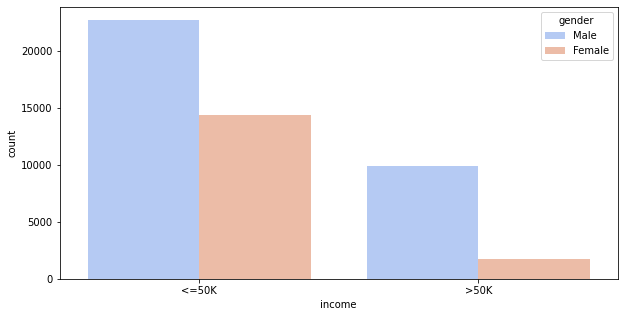

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df['income'],palette='coolwarm',hue='gender',data=df)

#### Checking the Income of the particular person with respect to race column using the Countplot 

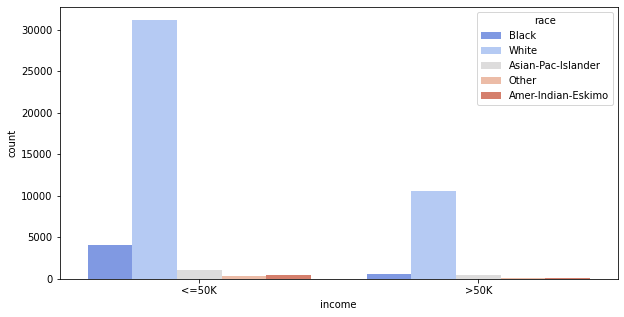

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df['income'],palette='coolwarm',hue='race',data=df)

#### Checking the Income of each person with respect to the relationship by using the countplot

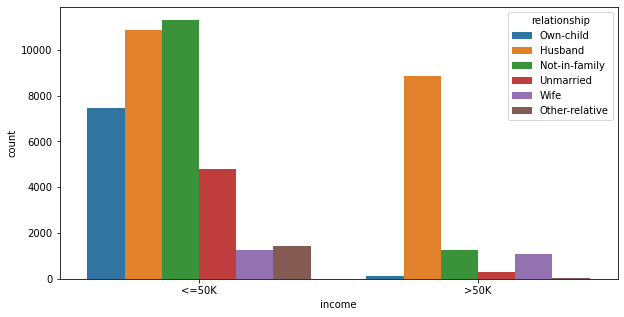

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df['income'],hue='relationship',data=df)

####  We have seen that ''?'' is been repeated in few columns so now  replace the unnamed value "?" with the most occur value in the Workclass column,occupation,and native-country by using the replace function  

In [16]:
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','prof-speciality')
df['native-country'] = df['native-country'].replace('?','United-States')

#### If u see in the education column there are too many values that contain the education details of each person now let us reduce the educational background details so it can be helpful for us while predicting the model accuaracy 

In [17]:
# education category

df.education= df.education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.education = df.education.replace('HS-grad','High school')
df.education = df.education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.education = df.education.replace('Bachelors','Undergrad')
df.education = df.education.replace('Masters','Grad')
df.education = df.education.replace('Doctorate','doc')

#### You can see for marital status also there are too many values which represent the marital status so let us reduce the  marital status details with just three values like married, single , and others.

In [18]:
# marital status

df['marital-status']= df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married')
df['marital-status'] = df['marital-status'].replace('Never-married','Single')
df['marital-status'] = df['marital-status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Others')


#### Let us change the income column with binary format which takes two values <=50k as 0 and >50k as 1 

In [19]:
# income

df.income = df.income.replace('<=50K',0)
df.income = df.income.replace('>50K',1)

#### Let us check our dataset after performing the above operations 

In [20]:
df.head()

age  workclass  fnlwgt    education  educational-num marital-status  \
0   25    Private  226802       school                7         Single   
1   38    Private   89814  High school                9        Married   
2   28  Local-gov  336951       higher               12        Married   
3   44    Private  160323       higher               10        Married   
4   18    Private  103497       higher               10         Single   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4    prof-speciality    Own-child  White  Female             0             0   

   hours-per-week native-country  income  
0              40  United-States       0  
1              50  United-States       0  
2              40  United-States       1  
3              40  United-States       1  
4              30  United-States       0

#### Now we can see that marital-status is reduced to three required values like Married,single and Others  

In [21]:
df['marital-status'].value_counts()

Married    22416
Single     16117
Others     10309
Name: marital-status, dtype: int64

#### Same as Marital-status we reduced the education column to most wanted school details

In [22]:
df['education'].value_counts()

High school    15784
higher         15374
Undergrad       8025
school          6408
Grad            2657
doc              594
Name: education, dtype: int64

In [23]:
## Checking the correlation in the dataset

df.corr()

age    fnlwgt  educational-num  capital-gain  \
age              1.000000 -0.076628         0.030940      0.077229   
fnlwgt          -0.076628  1.000000        -0.038761     -0.003706   
educational-num  0.030940 -0.038761         1.000000      0.125146   
capital-gain     0.077229 -0.003706         0.125146      1.000000   
capital-loss     0.056944 -0.004366         0.080972     -0.031441   
hours-per-week   0.071558 -0.013519         0.143689      0.082157   
income           0.230369 -0.006339         0.332613      0.223013   

                 capital-loss  hours-per-week    income  
age                  0.056944        0.071558  0.230369  
fnlwgt              -0.004366       -0.013519 -0.006339  
educational-num      0.080972        0.143689  0.332613  
capital-gain        -0.031441        0.082157  0.223013  
capital-loss         1.000000        0.054467  0.147554  
hours-per-week       0.054467        1.000000  0.227687  
income               0.147554        0.227687  1.000000

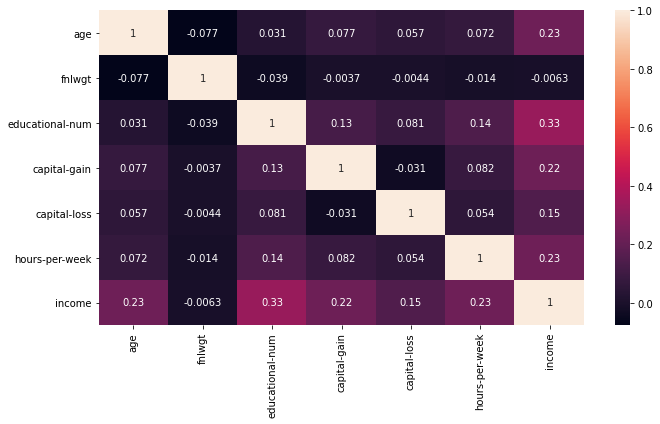

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.tight_layout()

#### Checking all the numerical columns in the dataset by plotting  the Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B186A3288>,
      dtype=object)

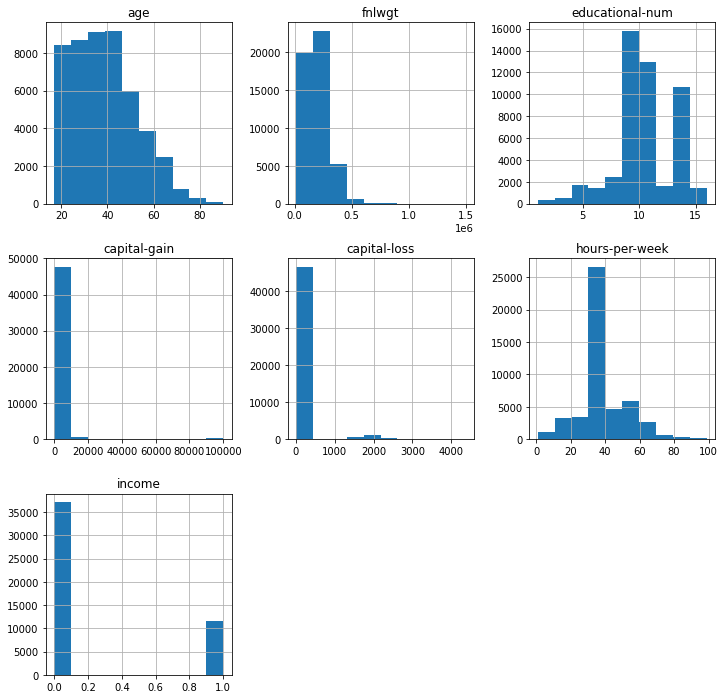

In [25]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

#### Plotting the boxplot to check the outliers in the given numerical columns in the dataset

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

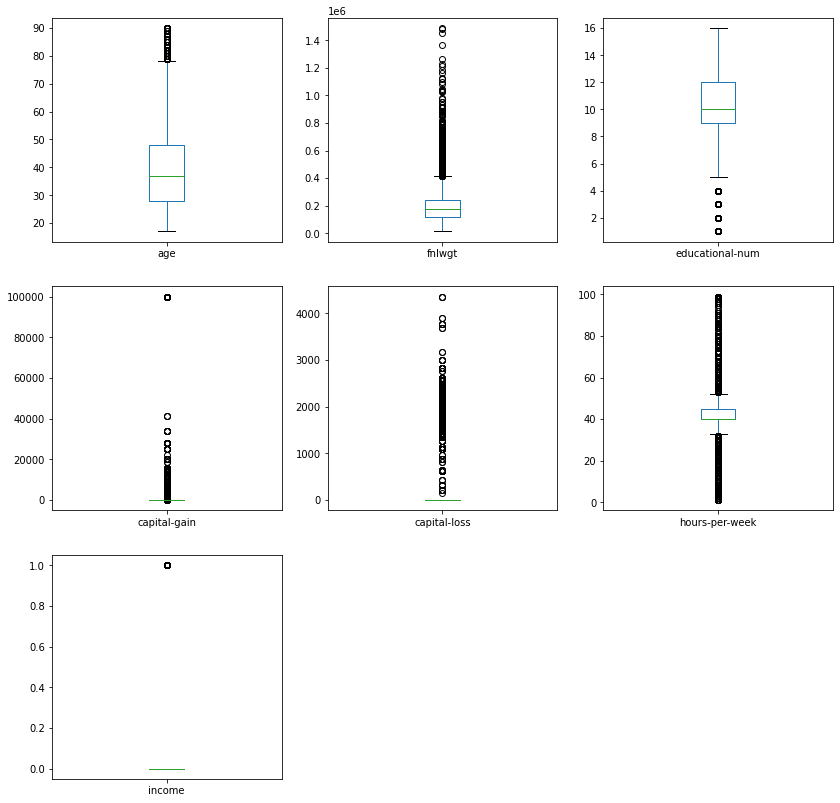

In [26]:
df.plot(kind='box',figsize=(14,14),layout=(3,3),sharex=False,subplots=True)

You can see that there are many outliers in the columns like hours-per-week,captial-loss,captial-gain,final weight, and age lets us remove this outliers by using the IQR method

#### let us remove the outliers from the dataset by using the Inter quartile range technique

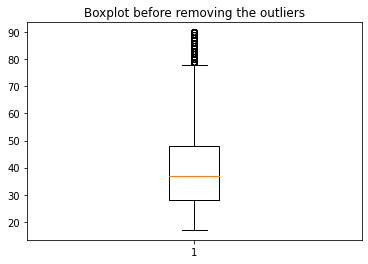

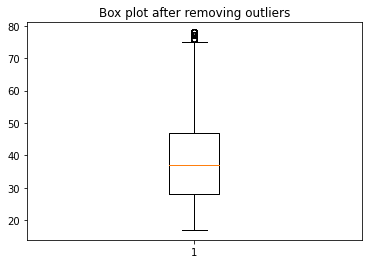

In [27]:
plt.boxplot(df['age'])
plt.title('Boxplot before removing the outliers')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

drop_outliers(df, 'age')
plt.boxplot(df['age'])
plt.title('Box plot after removing outliers')
plt.show()

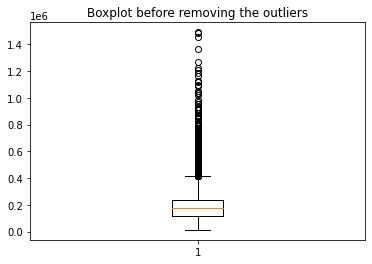

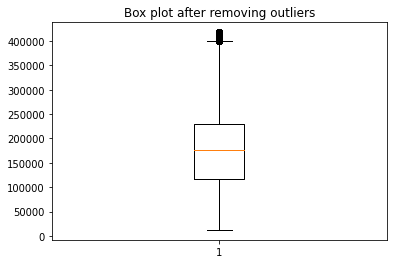

In [28]:
plt.boxplot(df['fnlwgt'])
plt.title('Boxplot before removing the outliers')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

drop_outliers(df, 'fnlwgt')
plt.boxplot(df['fnlwgt'])
plt.title('Box plot after removing outliers')
plt.show()

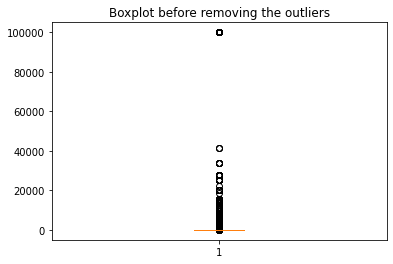

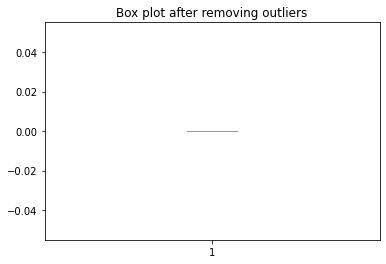

In [29]:
plt.boxplot(df['capital-gain'])
plt.title('Boxplot before removing the outliers')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

drop_outliers(df, 'capital-gain')
plt.boxplot(df['capital-gain'])
plt.title('Box plot after removing outliers')
plt.show()

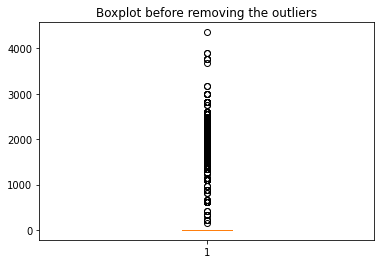

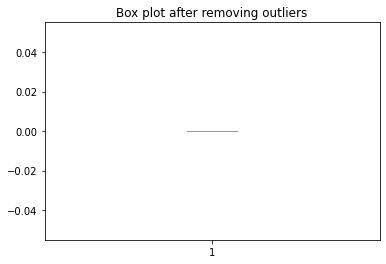

In [30]:
plt.boxplot(df['capital-loss'])
plt.title('Boxplot before removing the outliers')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

drop_outliers(df, 'capital-loss')
plt.boxplot(df['capital-loss'])
plt.title('Box plot after removing outliers')
plt.show()

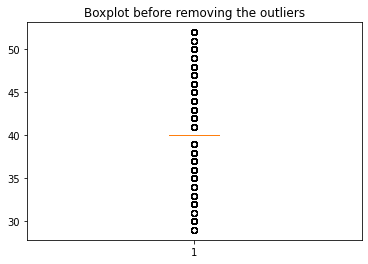

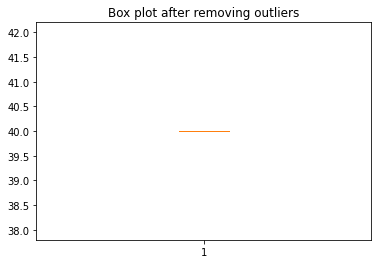

In [32]:
plt.boxplot(df['hours-per-week'])
plt.title('Boxplot before removing the outliers')
plt.show()

def drop_outliers(df, field_name):
    iqr = 1.5 *(np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+ np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)

drop_outliers(df, 'hours-per-week')
plt.boxplot(df['hours-per-week'])
plt.title('Box plot after removing outliers')
plt.show()

age                   AxesSubplot(0.125,0.657941;0.227941x0.222059)
fnlwgt             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
educational-num    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
capital-gain          AxesSubplot(0.125,0.391471;0.227941x0.222059)
capital-loss       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
hours-per-week     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
income                   AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

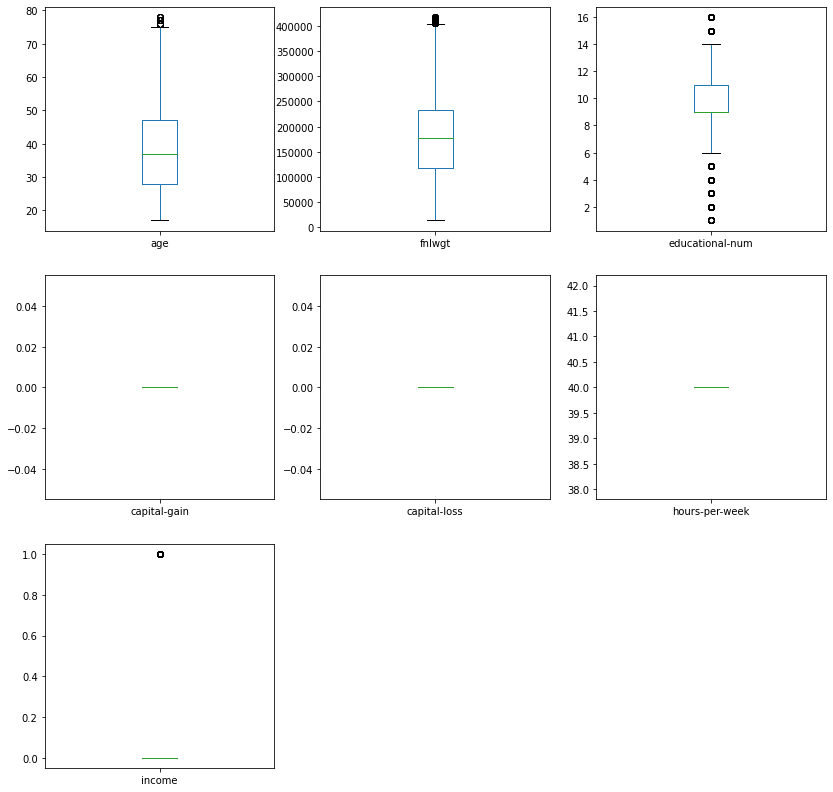

In [33]:
df.plot(kind='box',figsize=(14,14),layout=(3,3),sharex=False,subplots=True)

We have successfully removed the all the outliers in the dataset by using the IQR techinque we we analyze the data and can predict the better model accuarcy 

#### Let us understand the Probability and frequency distribution of each numerical column by using distplot

In [34]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

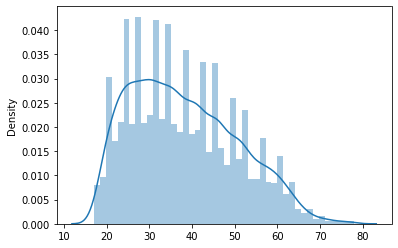

In [35]:
sns.distplot(df[['age']])

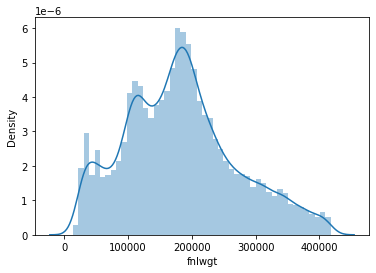

In [36]:
sns.distplot(df['fnlwgt'])

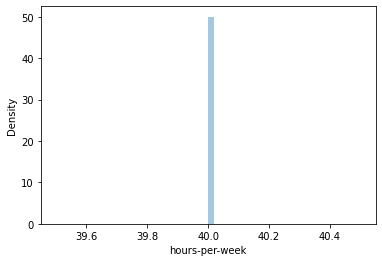

In [37]:
sns.distplot(df['hours-per-week'])

#### Let's check the percentage of people who are educated  based on the education column  

In [38]:
## We use plotly library to find the relationship between the education and its number 

px.pie(df, values='educational-num',names='education',title='percentage of education',
       color_discrete_sequence=px.colors.qualitative.T10)

#### Checking the income of particular person based on is race by plotting the countplot

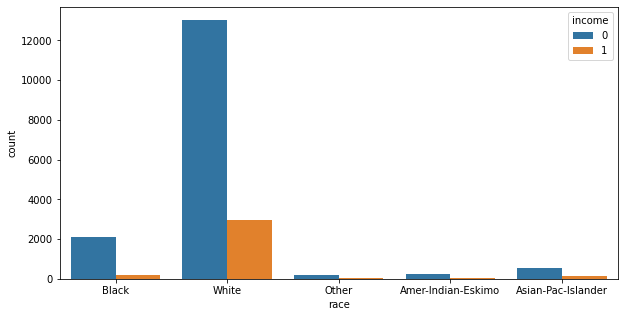

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(df['race'],hue='income',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

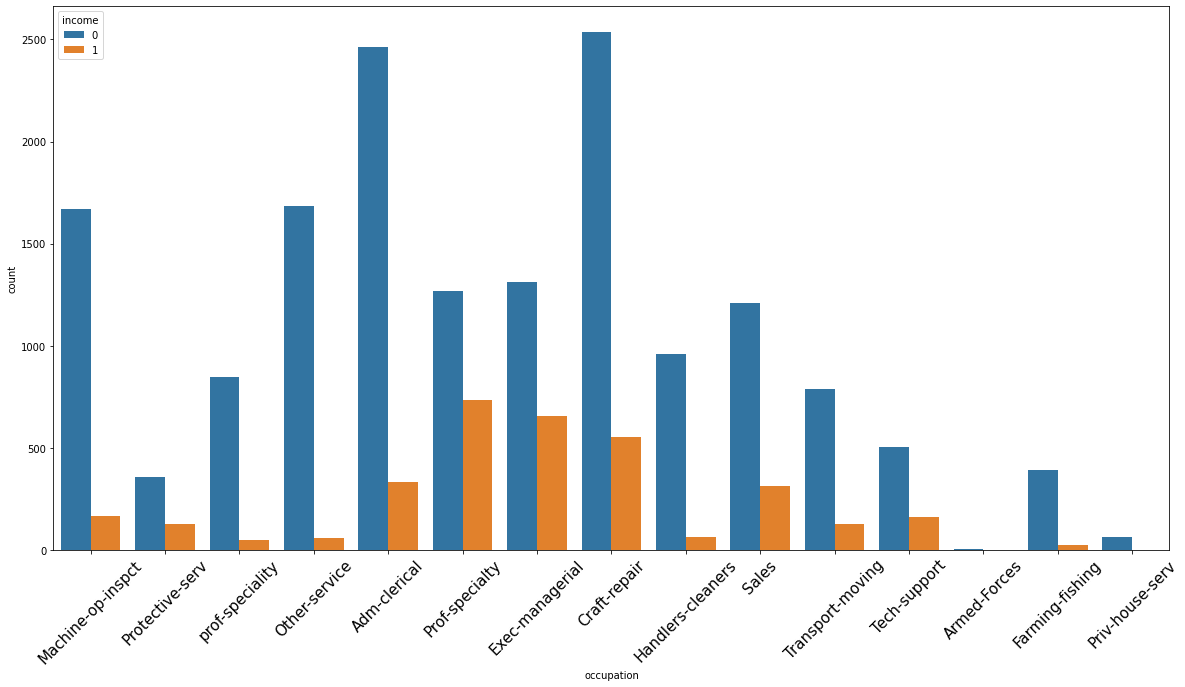

In [45]:
### Checking the Income of an individual based on thier occupation

plt.figure(figsize=(20,10))
sns.countplot(df['occupation'],hue='income',data=df)
plt.xticks(fontsize=15)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

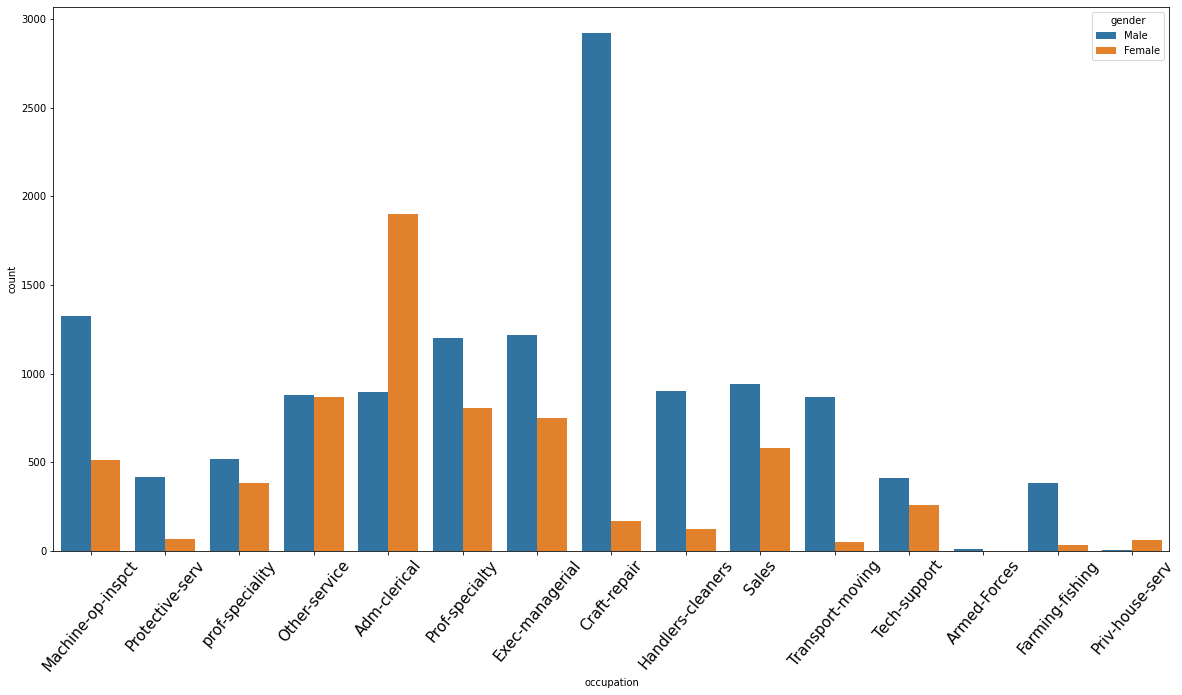

In [46]:
## Checking the Occupation of a particular individual based on their Gender 

plt.figure(figsize=(20,10))
sns.countplot(df['occupation'],hue='gender',data=df)
plt.xticks(fontsize=15)
plt.xticks(rotation=50)

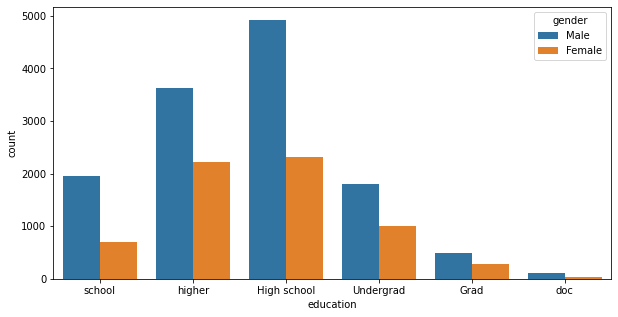

In [47]:
### Checking the relationshp between the education and the Gender 

plt.figure(figsize=(10,5))
sns.countplot(df['education'],hue='gender',data=df)

#### Analysing the data through the bivariate analysis approach using some plotting techinques

<Figure size 720x360 with 0 Axes>

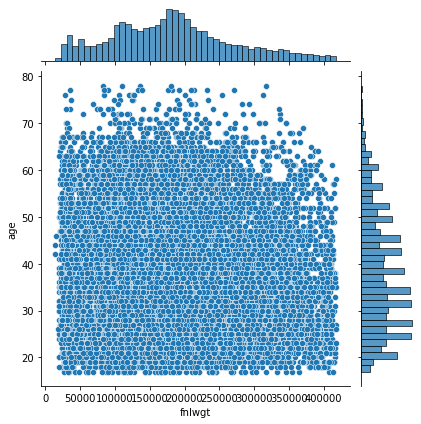

In [48]:
plt.figure(figsize=(10,5))
sns.jointplot(x='fnlwgt',y='age',data=df,kind='scatter')

<Figure size 720x360 with 0 Axes>

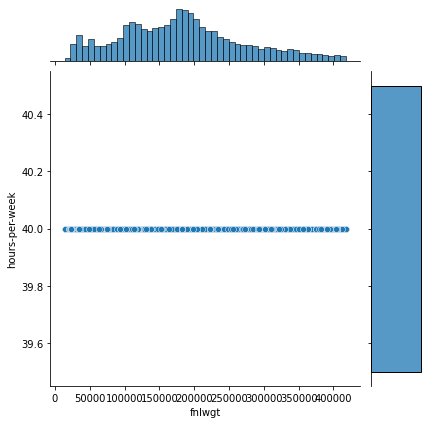

In [49]:
plt.figure(figsize=(10,5))
sns.jointplot(x='fnlwgt',y='hours-per-week',data=df, kind='scatter')

<Figure size 720x360 with 0 Axes>

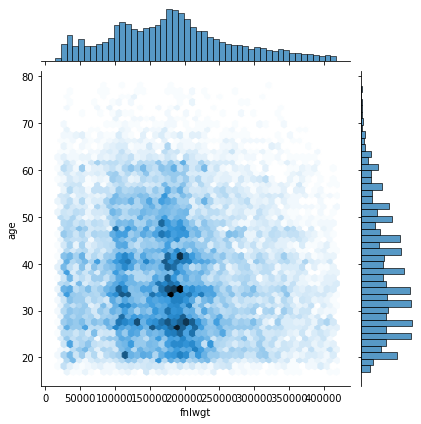

In [50]:
plt.figure(figsize=(10,5))
sns.jointplot(x='fnlwgt',y='age',kind='hex',data=df)

<Figure size 720x360 with 0 Axes>

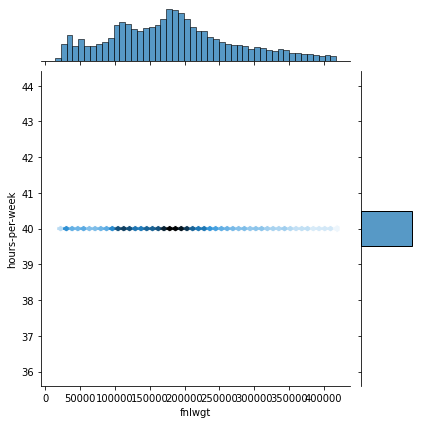

In [51]:
plt.figure(figsize=(10,5))
sns.jointplot(x='fnlwgt',y='hours-per-week',data=df,kind='hex')

#### Grpahical representation of whole numerical data from the dataset using the Pairplot method

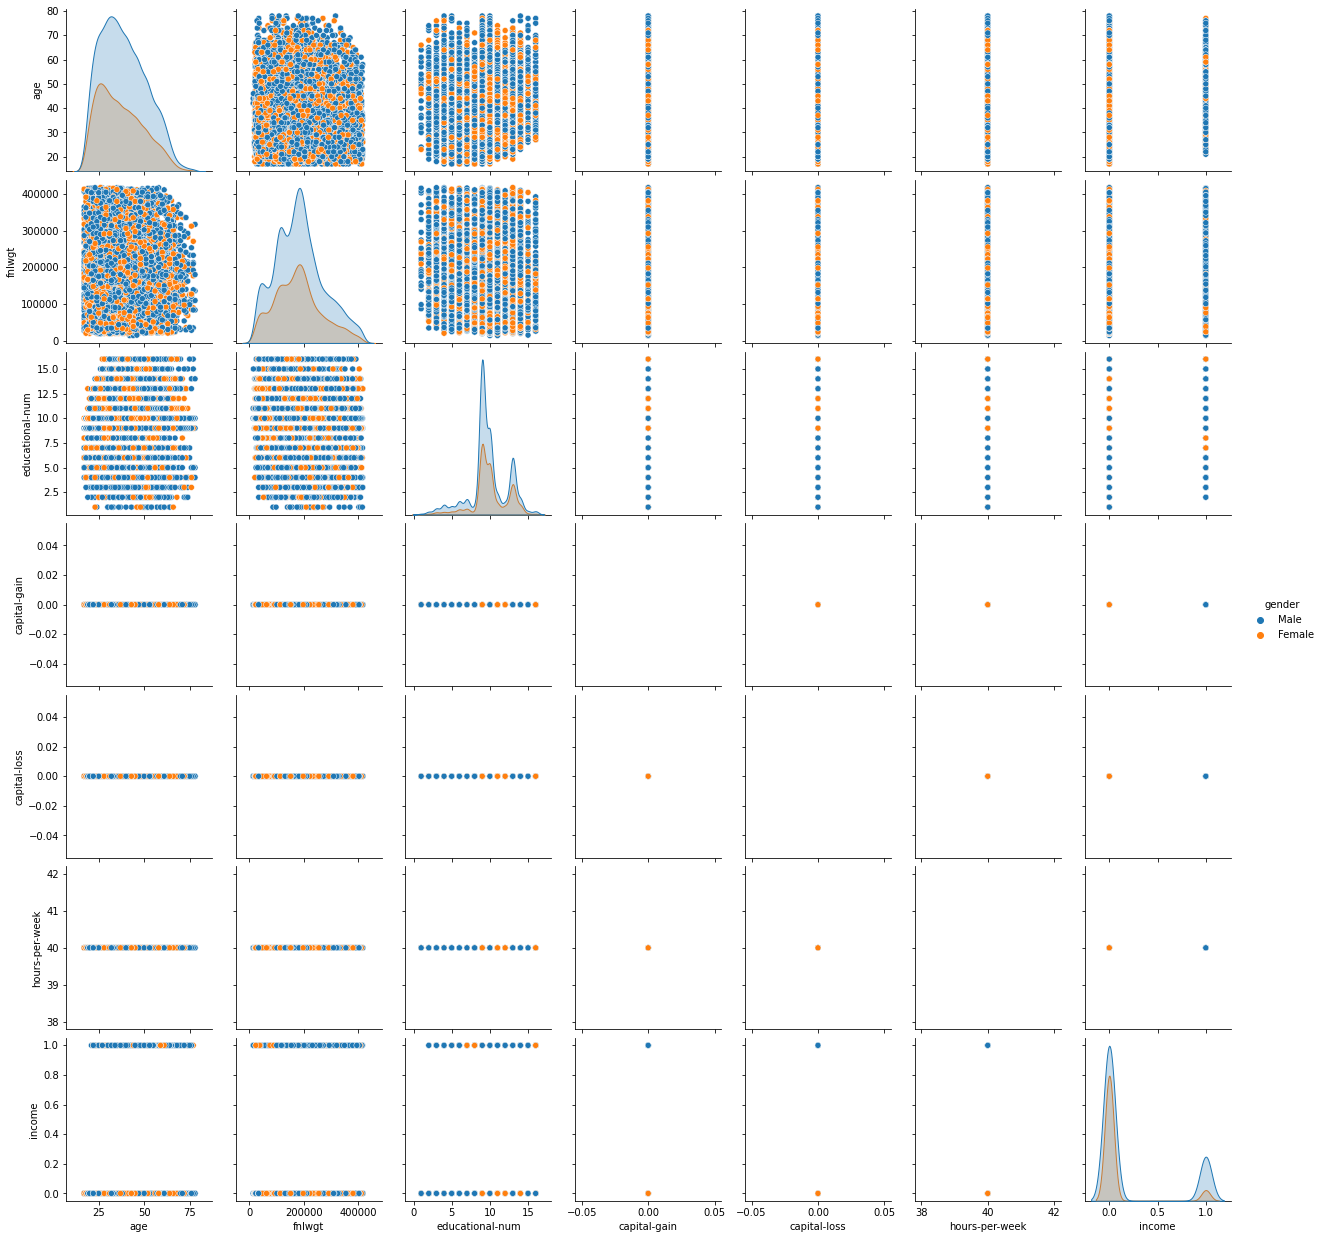

In [52]:
sns.pairplot(data=df,hue='gender')

#### Let us check relaionship between the categorical and numerical feature from the data by using some plotting techinques/methods 

In [53]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

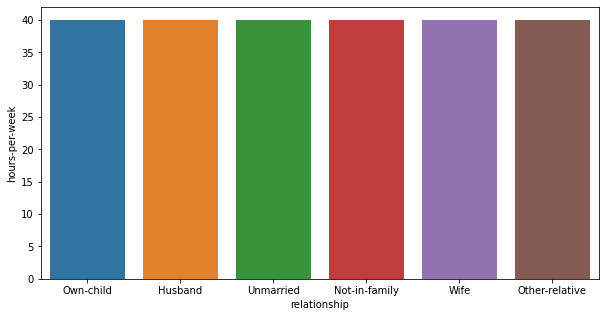

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='relationship',y='hours-per-week',data=df)

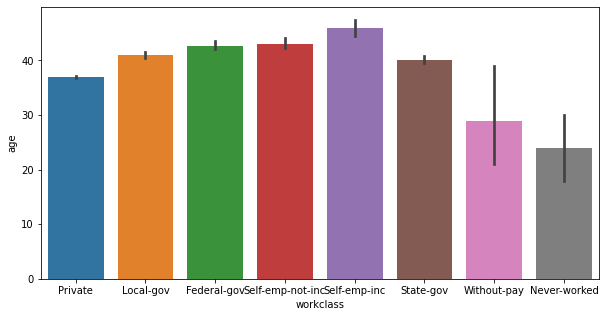

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x='workclass',y='age',data=df)

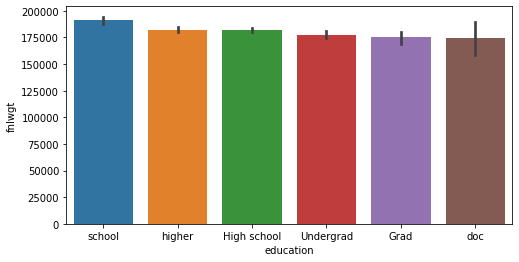

In [56]:
plt.figure(figsize=(8,4))
sns.barplot(x='education',y='fnlwgt',data=df)

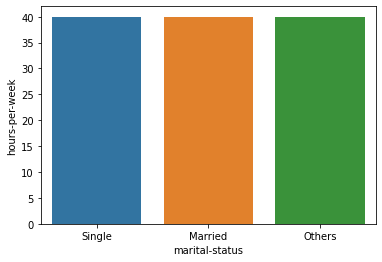

In [57]:

sns.barplot(x='marital-status',y='hours-per-week',data=df)

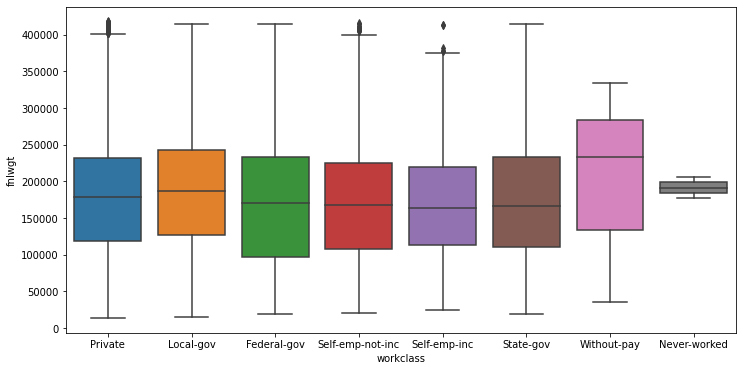

In [58]:
plt.figure(figsize=(12,6))
sns.boxplot(x='workclass',y='fnlwgt',data=df)

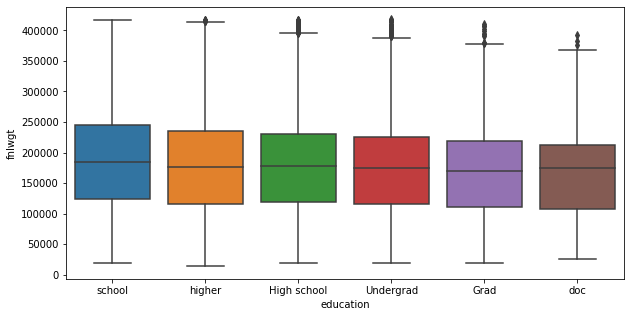

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(x='education',y='fnlwgt',data=df)

#### Let us build a model to predict the Income of a particular person based on the given dataset

In [60]:
x = df.drop(['income'],axis = 1)
y = df['income']

#### let us perform Feature scaling to make data look standardized 

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [62]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

age  workclass  fnlwgt  education  educational-num  marital-status  \
0     8          3   10248          5                6               2   
2    11          1   13383          4               11               0   
6    12          3   10260          1                8               2   
8     7          3   13930          4                9               2   
11   19          0    9544          2               12               0   

    occupation  relationship  race  gender  capital-gain  capital-loss  \
0            6             3     2       1             0             0   
2           10             0     4       1             0             0   
6           14             4     2       1             0             0   
8            7             4     4       0             0             0   
11           0             0     4       1             0             0   

    hours-per-week  native-country  income  
0                0              37       0  
2                0              37       1  
6                0              37       0  
8                0              37       0  
11               0              37       0

In [63]:
ss = StandardScaler().fit(df1.drop('income',axis=1))

In [64]:
X = ss.transform(df1.drop('income',axis=1))
y = df['income']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

#### Let's implement the Logistic regression algorithm to predict the model 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
## performing Logistic Regression to predict the model

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions=logisticRegr.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))

[[3886  175]
 [ 524  274]]


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4061
           1       0.61      0.34      0.44       798

    accuracy                           0.86      4859
   macro avg       0.75      0.65      0.68      4859
weighted avg       0.84      0.86      0.84      4859



#### Let's predict the model by using Random forest classifier algorithm

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
## Performing the Random forest classifier 

rfc = RandomForestClassifier(n_jobs=2,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [74]:
y_pred=rfc.predict(X_test)

In [75]:
from sklearn import metrics

print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Precision=",metrics.precision_score(y_test,y_pred))
print("Recall=",metrics.recall_score(y_test,y_pred))

Accuracy= 0.8394731426219386
Precision= 0.5151006711409396
Recall= 0.38471177944862156


In [76]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [77]:
print(confusion_matrix(y_test,y_pred))

[[3772  289]
 [ 491  307]]


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4061
           1       0.52      0.38      0.44       798

    accuracy                           0.84      4859
   macro avg       0.70      0.66      0.67      4859
weighted avg       0.82      0.84      0.83      4859



In [79]:
## Performing Gradient Boosting algorithm to improve the model performance

from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(learning_rate=0.01,random_state=0)
GB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
## Calculating the Accuracy score for Gradient boosting algorithm

GB.score(X_test,y_test)

0.8357686766824449

#### Implementing DecisionTreeClassifier to predict the model 

In [81]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=10,min_samples_leaf=12)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [82]:
y_pred_en= DTC.predict(X_test)

In [83]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(y_test, y_pred_en))
print("Precision=",metrics.precision_score(y_test,y_pred_en))
print("Recall=",metrics.recall_score(y_test,y_pred_en))

Accuracy= 0.8524387734101667
Precision= 0.5724508050089445
Recall= 0.40100250626566414


In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes,ensemble, discriminant_analysis, gaussian_process

### Let's compare all the model performance to select the best model 

Here are the List of Machine learning algorithms(MLA) Used to predict the model

In [85]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    ]

In [ ]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare